**Dona Ana, New Mexico**

Lara Karacasu

PIT-DSC 2022

**Dona Ana Data Analysis**

In [ ]:
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Dona Ana Analysis, by Lara Karacasu

import pandas as pd
df = pd.read_csv("/dona-ana-cleaned-v2.csv")

# YEAR ANALYSIS: PART 1.1
year_group = df['Death Year']
count_2013, count_2014, count_2015, unk_count, total_count = (0, 0, 0, 0, 0)
for group in year_group:
    total_count += 1
    if group == 2013:
        count_2013 += 1
    elif group == 2014:
        count_2014 += 1
    elif group == 2015:
        count_2015 += 1
    else:
        unk_count += 1

year_group_dict = {
    "2013": count_2013,
    "2014": count_2014,
    "2015": count_2015,
    "Unknown": unk_count,
    "Total": total_count
}

print("Death year divisions are as follows: ")
for key, val in year_group_dict.items():
    print(key + ": " + str(val))
print("\n")

# AGE ANALYSIS: PART 1.2
age_group = df['Age Group']
infant_count, teen_count, adult_count, elder_count, unk_count, total_count = (0, 0, 0, 0, 0, 0)
for group in age_group:
    total_count += 1
    if type(group) != float: # exclude NaN cells
        if group == "Infant":
            infant_count += 1
        if group == "Adolescent":
            teen_count += 1
        elif group == "Adult":
            adult_count += 1
        elif group == "Elder":
            elder_count += 1
    else:
        unk_count += 1

age_group_dict = {
    "Infant": infant_count,
    "Adolescent": teen_count,
    "Adult": adult_count,
    "Elder": elder_count,
    "Unknown": unk_count,
    "Total": total_count
}

print("Age divisions are as follows: ")
for key, val in age_group_dict.items():
    print(key + ": " + str(val))
print("\n")

# NO SEXES ARE GIVEN: PART 1.3 NOT APPLICABLE

# NO RACES ARE GIVEN: PART 1.4 NOT APPLICABLE

Death year divisions are as follows: 
2013: 11
2014: 24
2015: 11
Unknown: 1
Total: 47


Age divisions are as follows: 
Infant: 0
Adolescent: 0
Adult: 15
Elder: 31
Unknown: 1
Total: 47




**Dona Ana Visualizations**

In [ ]:
# Visualizing aggregate annual burial trends for Dona Ana

df = pd.DataFrame.from_dict(year_group_dict, orient = 'index')
df.columns = ['Number of deaths']
df = df[:-2] # Exclude Unknown and Total from dataframe
df

,Number of deaths
2013,11
2014,24
2015,11


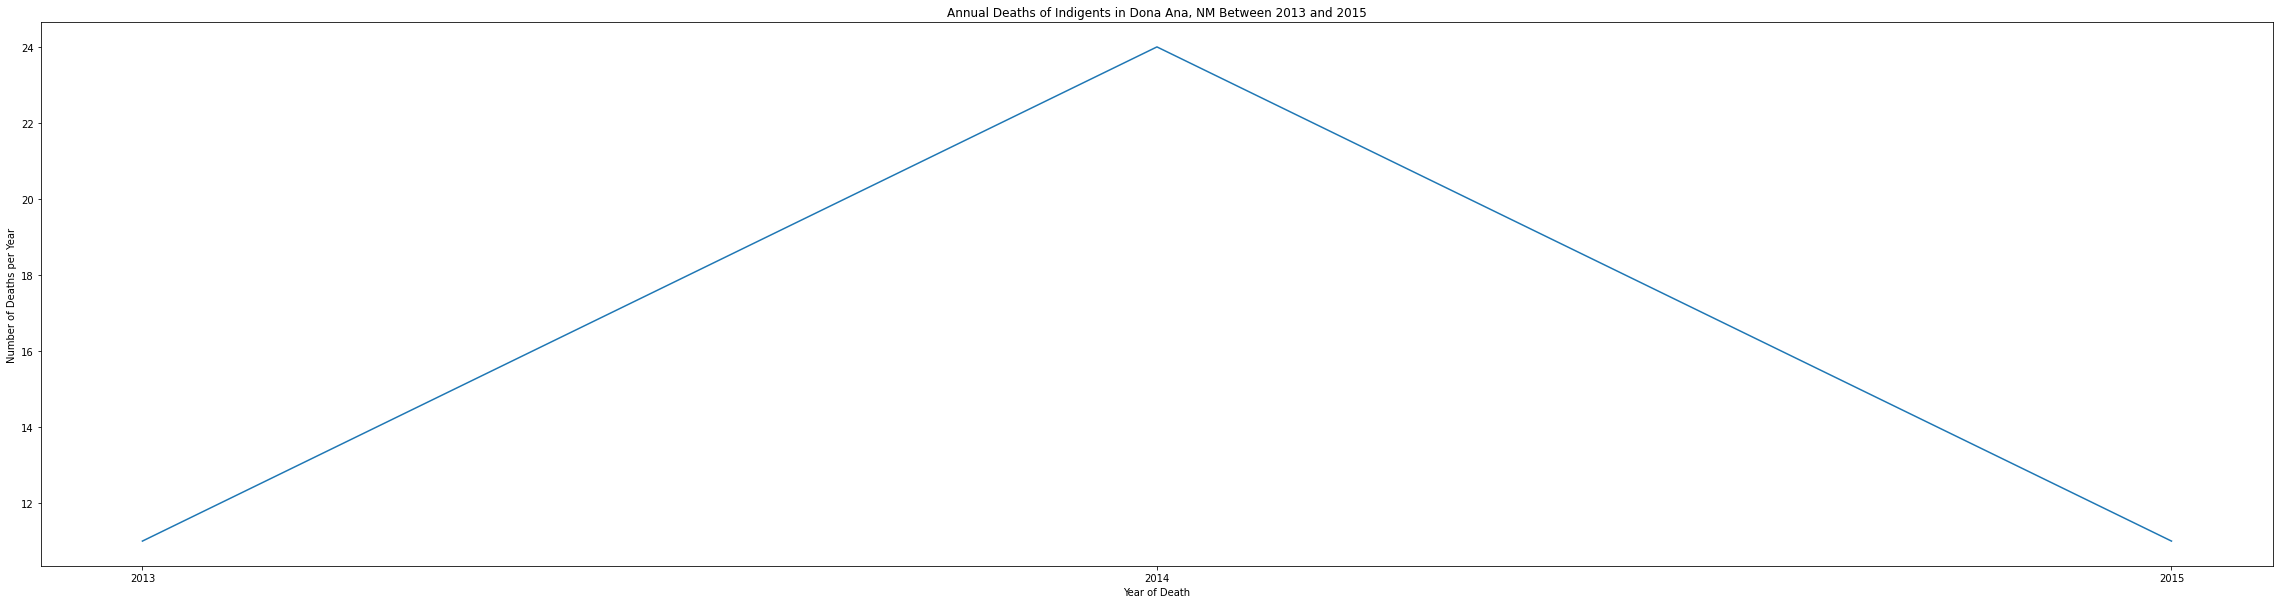

In [ ]:
fig = plt.figure(figsize = (40, 10))
ax = fig.add_subplot()
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths per Year")
ax.set_title("Annual Deaths of Indigents in Dona Ana, NM Between 2013 and 2015")
ax.plot(df)

In [ ]:
age_df = pd.DataFrame.from_dict(age_group_dict, orient = 'index')
age_df.columns = ['Count']
age_df = age_df[2:-1] # exclude Total Count from dataframe
age_df

,Count
Adult,15
Elder,31
Unknown,1


Text(0, 0.5, '')

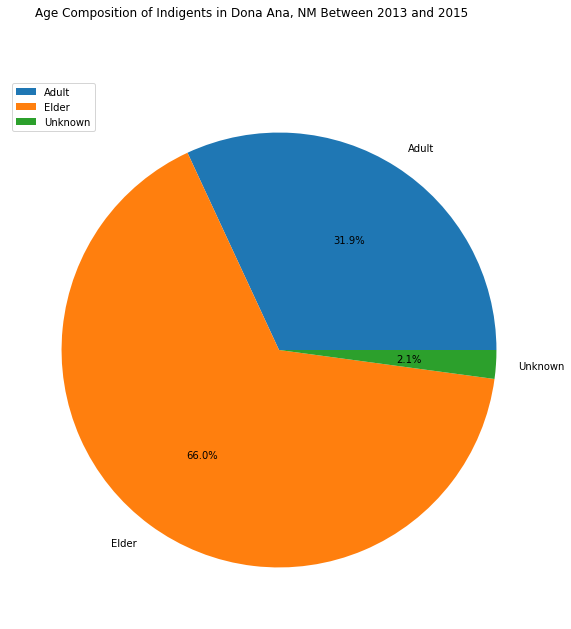

In [ ]:
age_plot = age_df.plot.pie(subplots=True, figsize=(30, 10), title = "Age Composition of Indigents in Dona Ana, NM Between 2013 and 2015", autopct='%1.1f%%')
pylab.ylabel('')

In [ ]:
fig = px.pie(age_df, values=[0, 0, 0, 15, 31, 1], names=['Infant', 'Child', 'Adolescent', 'Adult', 'Elder', 'Unknown'], color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="Age Composition of Indigents in Dona Ana, NM Between 2013 and 2015")
fig.show()